In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from xhistogram.xarray import histogram
from xmovie import Movie
import gsw

In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)
    Hsbl_tmp = np.nanmean(ds.variables["Hsbl"], axis=0)

    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w + ds.zice

    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)

    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        m = m_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
        Hsbl = Hsbl_tmp
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        m = np.stack((m,m_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
        Hsbl = np.stack((Hsbl,Hsbl_tmp), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m = np.concatenate((m,m_tmp_4thdim), axis=0)
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0)
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0)
        Hsbl_tmp_4thdim = np.expand_dims(Hsbl_tmp, axis=0)
        Hsbl = np.concatenate((Hsbl,Hsbl_tmp_4thdim), axis=0)
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()

sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000


(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [3]:
di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]

mask_zice = ma.masked_where(ice_draft < 0, np.ones(ice_draft.shape))

di.close()

# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset

# shelf/open-ocean masks:
mask_open = ma.masked_where(dg.h <= 2000, np.ones(dg.h.shape))
mask_shelf = ma.masked_where(dg.h > 2000, np.ones(dg.h.shape))


(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


In [4]:
dx = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/MLD_vint_vars_for_WMT_m.s-1_iteractive_copy.nc')
print(dx.variables["sfc_mld"].shape)
sfc_mld = dx.variables["sfc_mld"]
# - variables across ML base

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_mld_vint = dx.variables["temp_vdia_diff_mld_vint"]
salt_vdia_diff_mld_vint = dx.variables["salt_vdia_diff_mld_vint"]
temp_hdia_diff_mld_vint = dx.variables["temp_hdia_diff_mld_vint"]
salt_hdia_diff_mld_vint = dx.variables["salt_hdia_diff_mld_vint"]
temp_vdia_adv_mld_vint = dx.variables["temp_vdia_adv_mld_vint"]
salt_vdia_adv_mld_vint = dx.variables["salt_vdia_adv_mld_vint"]
temp_hdia_adv_mld_vint = dx.variables["temp_hdia_adv_mld_vint"]
salt_hdia_adv_mld_vint = dx.variables["salt_hdia_adv_mld_vint"]
temp_tend_mld_vint = dx.variables["temp_tend_avg_mld_vint"]
salt_tend_mld_vint = dx.variables["salt_tend_avg_mld_vint"]

sigma_t = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

dx.close()

(12, 560, 630)


In [5]:
# calculate salt/temp averaged for ML and below:

salt_mld = np.empty(salt[:,0,:,:].shape)
temp_mld = np.empty(salt[:,0,:,:].shape)

for mm in np.arange(0,12):
    depth = np.squeeze(z_rho[mm,:,:,:])
    depth_sort = depth.transpose(2,0,1) #'s_rho','eta_rho','xi_rho')
#    print(depth_sort.shape)
    print(mm)

    salt_mld_tmp = ma.masked_where(-depth_sort > -np.squeeze(Hsbl[mm,:,:]), salt[mm,:,:,:])
    temp_mld_tmp = ma.masked_where(-depth_sort > -np.squeeze(Hsbl[mm,:,:]), temp[mm,:,:,:])
    print(salt_mld_tmp.shape)

    # put SSS/SST into salt/temp_mld var independently to get rid of masked values when Hsbl < first layer of depth_sort
    salt_mld_tmp[-1,:,:] = salt[mm,-1,:,:]
    temp_mld_tmp[-1,:,:] = temp[mm,-1,:,:]

    salt_mld[mm,:,:] = np.nanmean(salt_mld_tmp, axis=0)
    temp_mld[mm,:,:] = np.nanmean(temp_mld_tmp, axis=0)
    del depth, depth_sort #, salt_mld_tmp, temp_mld_tmp, salt_deep_tmp, temp_deep_tmp

0
(31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


1
(31, 560, 630)
2
(31, 560, 630)
3
(31, 560, 630)
4
(31, 560, 630)
5
(31, 560, 630)
6
(31, 560, 630)
7
(31, 560, 630)
8
(31, 560, 630)
9
(31, 560, 630)
10
(31, 560, 630)
11
(31, 560, 630)


In [6]:
# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
mask_Wed1lon = ma.masked_where(lon_rho <= -90, np.ones(lon_rho.shape)) # West limit for lat<-75
mask_Wed1lat = ma.masked_where(lat_rho > -75, np.ones(lat_rho.shape))
mask_Wed1 = mask_Wed1lon*mask_Wed1lat

mask_Wed2lon = ma.masked_where(lon_rho <= -65, np.ones(lon_rho.shape)) # West limit for lat<-75
mask_Wed2lat = ma.masked_where(lat_rho <= -75, np.ones(lat_rho.shape))
mask_Wed2 = mask_Wed2lon*mask_Wed2lat

mask_Wed12 = np.ma.array(mask_Wed1.filled(1) * mask_Wed2.filled(1), mask=(mask_Wed1.mask * mask_Wed2.mask))

mask_Wed3= ma.masked_where(lon_rho > -25, np.ones(lon_rho.shape)) # East limit for any latitude

mask_Wed = mask_Wed12*mask_Wed3

# 2) Mask Maud Land (25W : 60E, lat < -60)

mask_Mau1lon = ma.masked_where(lon_rho <= -25, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau1 = mask_Mau1lon*mask_Mau1lat

mask_Mau2lon = ma.masked_where(lon_rho >= 60, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau2 = mask_Mau2lon*mask_Mau2lat

mask_Mau = mask_Mau1*mask_Mau2

# 3) Mask East Antarctica (60E : 160E, lat < -60)

mask_EAnt1lon = ma.masked_where(lon_rho < 60, np.ones(lon_rho.shape)) # East limit for any latitude
mask_EAnt1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_EAnt1 = mask_EAnt1lon*mask_EAnt1lat

mask_EAnt2lon = ma.masked_where(lon_rho >= 160, np.ones(lon_rho.shape)) # East limit for any latitude
mask_EAnt2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_EAnt2 = mask_EAnt2lon*mask_EAnt2lat

mask_EAnt = mask_EAnt1*mask_EAnt2

# 4) Mask Ross (140W : 160E, lat < -60)

mask_Ros1lon = ma.masked_where(lon_rho < 160, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Ros1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Ros1 = mask_Ros1lon*mask_Ros1lat

mask_Ros2lon = ma.masked_where(lon_rho >= -150, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Ros2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Ros2 = mask_Ros2lon*mask_Ros2lat

mask_Ros = np.ma.array(mask_Ros1.filled(1) * mask_Ros2.filled(1), mask=(mask_Ros1.mask * mask_Ros2.mask))

# 5) Mask West Antarctica (150W : 90W, lat < -65)

mask_WAnt1 = ma.masked_where(lon_rho < -150, np.ones(lon_rho.shape)) # West limit for any latitude

mask_WAnt2lon = ma.masked_where(lon_rho > -90, np.ones(lon_rho.shape)) # East limit for lat <-73
mask_WAnt2lat = ma.masked_where(lat_rho > -75, np.ones(lat_rho.shape))
mask_WAnt2 = mask_WAnt2lon*mask_WAnt2lat

mask_WAnt3lon = ma.masked_where(lon_rho > -65, np.ones(lon_rho.shape)) # East limit for lat >-73
mask_WAnt3lat = ma.masked_where(lat_rho <= -75, np.ones(lat_rho.shape))
mask_WAnt3 = mask_WAnt3lon*mask_WAnt3lat

mask_WAnt23 = np.ma.array(mask_WAnt2.filled(1) * mask_WAnt3.filled(1), mask=(mask_WAnt2.mask * mask_WAnt3.mask))

mask_WAnt = mask_WAnt1*mask_WAnt23

In [7]:
sbins = np.arange(31,36, 0.025)
tbins = np.arange(-3, 10, 0.1)

Salt = xr.DataArray(salt_mld*mask_shelf, name='S')
Temp = xr.DataArray(temp_mld*mask_shelf, name='T')
Salt_wed = xr.DataArray(salt_mld*mask_shelf*mask_Wed, name='S')
Temp_wed = xr.DataArray(temp_mld*mask_shelf*mask_Wed, name='T')
Salt_mau = xr.DataArray(salt_mld*mask_shelf*mask_Mau, name='S')
Temp_mau = xr.DataArray(temp_mld*mask_shelf*mask_Mau, name='T')
Salt_eant = xr.DataArray(salt_mld*mask_shelf*mask_EAnt, name='S')
Temp_eant = xr.DataArray(temp_mld*mask_shelf*mask_EAnt, name='T')
Salt_ros = xr.DataArray(salt_mld*mask_shelf*mask_Ros, name='S')
Temp_ros = xr.DataArray(temp_mld*mask_shelf*mask_Ros, name='T')
Salt_want = xr.DataArray(salt_mld*mask_shelf*mask_WAnt, name='S')
Temp_want = xr.DataArray(temp_mld*mask_shelf*mask_WAnt, name='T')


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


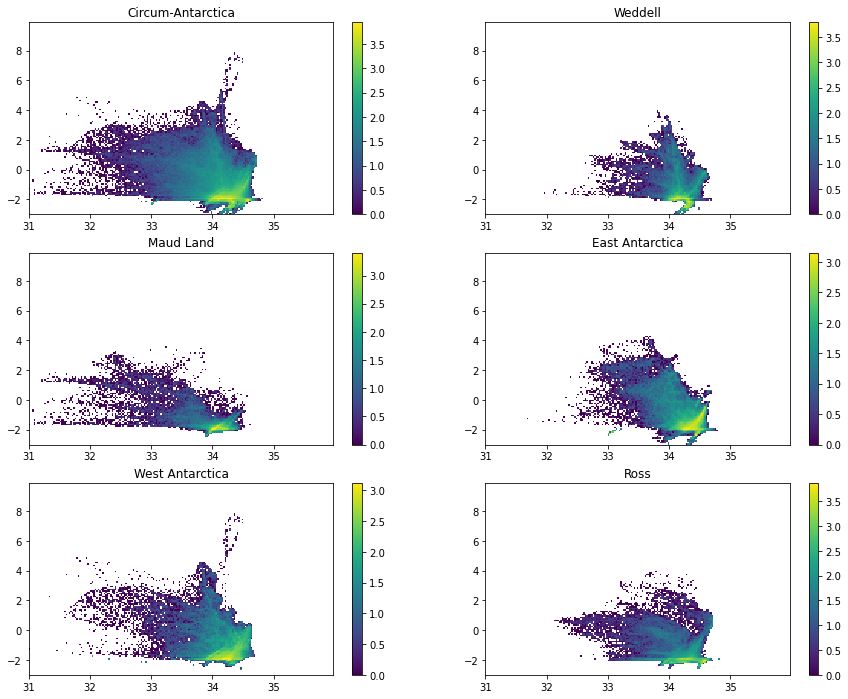

In [8]:
[S,T] = np.meshgrid(sbins,tbins)
# histogram of number of data points
#hTS = histogram(xr.DataArray(salt_mld, name='S'), xr.DataArray(temp_mld, name='T'), bins=[sbins, tbins])
hTS = histogram(Salt, Temp, bins=[sbins, tbins])#, weights=dArea)
hTS_wed = histogram(Salt_wed, Temp_wed, bins=[sbins, tbins])
hTS_mau = histogram(Salt_mau, Temp_mau, bins=[sbins, tbins])
hTS_eant = histogram(Salt_eant, Temp_eant, bins=[sbins, tbins])
hTS_ros = histogram(Salt_ros, Temp_ros, bins=[sbins, tbins])
hTS_want = histogram(Salt_want, Temp_want, bins=[sbins, tbins])

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(321)
plt.pcolormesh(S,T,np.log10(hTS.T))
plt.colorbar(), plt.title("Circum-Antarctica")

ax2 = fig.add_subplot(322)
plt.pcolormesh(S,T,np.log10(hTS_wed.T))
plt.colorbar(), plt.title("Weddell")

ax3 = fig.add_subplot(323)
plt.pcolormesh(S,T,np.log10(hTS_mau.T))
plt.colorbar(), plt.title("Maud Land")

ax4 = fig.add_subplot(324)
plt.pcolormesh(S,T,np.log10(hTS_eant.T))
plt.colorbar(), plt.title("East Antarctica")

ax5 = fig.add_subplot(326)
plt.pcolormesh(S,T,np.log10(hTS_ros.T))
plt.colorbar(), plt.title("Ross")

ax6 = fig.add_subplot(325)
plt.pcolormesh(S,T,np.log10(hTS_want.T))
plt.colorbar(), plt.title("West Antarctica")
plt.show()

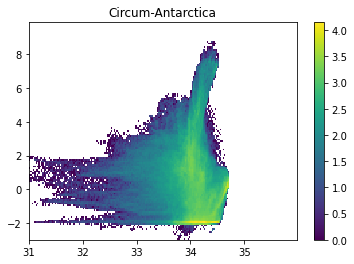

In [9]:
Salt_open = xr.DataArray(salt_mld*mask_open, name='S')
Temp_open = xr.DataArray(temp_mld*mask_open, name='T')
hTS_open = histogram(Salt_open, Temp_open, bins=[sbins, tbins])#, weights=dArea)

plt.pcolormesh(S,T,np.log10(hTS_open.T))
plt.colorbar(), plt.title("Circum-Antarctica")
plt.show()

In [10]:
# calculate WMT from budget vars:

# obtain thermal expansion (alpha) & salinity contraction (beta) coefficients:
SA = np.empty(salt.shape)
# neet Absolute Salinity, converting from Pratical Salinity:
print('salt and z_rho shape:', np.squeeze(salt[0,0,:,:]).shape,np.squeeze(z_rho[0,:,:,0].shape))
for mm in np.arange(0,12):
    for kk in np.arange(0,31):
        SA_tmp =gsw.SA_from_SP(np.squeeze(salt[mm,kk,:,:]),np.squeeze(z_rho[mm,:,:,kk]),lon_rho,lat_rho)
        SA[mm,kk,:,:] = SA_tmp
        del SA_tmp

# gsw.alpha/gsw.beta
#alpha = gsw_alpha(SA,CT,p)
[specvol, alpha, beta] = gsw.specvol_alpha_beta(SA,temp,z_rho.transpose(0,3,1,2))
rho0 = 1025
Cp = 3985

# total diffusion terms:
R_s_vint = (salt_hdia_diff_mld_vint + salt_vdia_diff_mld_vint)
R_t_vint = (temp_hdia_diff_mld_vint + temp_vdia_diff_mld_vint)

# surface flux terms:
salt_sfc = beta[:,-1,:,:]*(ssflux)
temp_sfc = alpha[:,-1,:,:]*(np.divide(shflux, rho0*Cp))

# advection terms:
salt_adv_mld_vint = (salt_hdia_adv_mld_vint + salt_vdia_adv_mld_vint)
temp_adv_mld_vint = (temp_hdia_adv_mld_vint + temp_vdia_adv_mld_vint)

# net tendencies
salt_net_mld_vint = salt_tend_mld_vint
temp_net_mld_vint = temp_tend_mld_vint


salt and z_rho shape: (560, 630) [560 630]


In [11]:
# salt_net_mld_vint.shape
sigma_t.shape

(12, 560, 630)

In [12]:
#  Function to calculate Water Mass Transformation (in m3/s): density-space

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
#rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
rho_grid=np.arange(26.,28.,0.05) # for sigma-0

len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
dt = 86400#30#/12 #why divide by 12?

def wmt(var_int, dx, dy,var_type):
    # var_type: 'budget' or 'sfc_frc'

    F_rate_var_vint = np.empty(var_int.shape)

    for mm in np.arange(0,12):
        if var_type == 'budget':
            F_rate_var_vint[mm,:] = dx*dy*var_int.isel(times=mm)
        elif var_type == 'sfc_frc':
            F_rate_var_vint[mm,:] = dx*dy*var_int[mm,:,:]

    print(F_rate_var_vint.shape)

    F_rate_delta_var_vint_mm = np.empty((12,len_rho_grid,560,630))
    F_rate_delta = np.empty((len_rho_grid,560,630))

    for mm in np.arange(0,12):
        sigma_tmp = sigma_t[mm,:,:]

        #print(mm)
        for irho in np.arange(0,len_rho_grid):

            #print(irho)
            F_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), F_rate_var_vint[mm,:,:])

#             if irho == 0:
#                 F_rate_delta = F_rate_tmp.copy()
#                 F_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
#             elif irho == 1:
#                 F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
#                 F_rate_delta = np.stack((F_rate_delta,F_rate_tmp), axis=0)
#             else:
#                 F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
#                 F_rate_extradim = np.expand_dims(F_rate_tmp, axis=0)
#                 F_rate_delta = np.concatenate((F_rate_delta,F_rate_extradim), axis=0)
#             del F_rate_tmp
            F_rate_tmp[np.logical_and(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            F_rate_delta[irho,:,:] = F_rate_tmp # allocate xi_rho, eta_rho array
                       
        F_rate_delta_var_vint_mm[mm,:] = F_rate_delta

    print('completed, size: ', F_rate_delta_var_vint_mm.shape)

    return F_rate_delta_var_vint_mm


In [13]:
# 2nd attempt TS-space; combined T and S

sbins = np.arange(31,35, 0.05) # aim for S interval = 0.025
tbins = np.arange(-3, 8, 0.2)+273.15 # aim for T interval = 0.1 in Kelvin!
len_tbin = len(tbins)
len_sbin = len(sbins)

def wmt_TS(var_int, dx, dy,var_type):
    # var_type: 'budget' or 'sfc_frc'

    F_rate_var_vint = np.empty(var_int.shape)

    for mm in np.arange(0,12):
        if var_type == 'budget':
            F_rate_var_vint[mm,:] = dx*dy*var_int.isel(times=mm)
        elif var_type == 'sfc_frc':
            F_rate_var_vint[mm,:] = dx*dy*var_int[mm,:,:]

    print(F_rate_var_vint.shape)

#     F_TS_rate_delta_var_vint_mm = np.empty((12,len_tbin,len_sbin,560,630))
    F_TS_rate_delta_var_vint_mm = np.empty((1,len_tbin,len_sbin,560,630))
    
    for mm in np.arange(0,1):#12):
        temp_tmp = Temp[mm,:,:]+273.15 # convert to Kelvin
        salt_tmp = Salt[mm,:,:]

        F_rate_delta = np.empty((len_tbin,len_sbin,560,630))

        #print(mm)
        for itemp in np.arange(0,len_tbin):
            for isalt in np.arange(0,len_sbin):
                # create mask=True for values outside Tbin/Sbin, and F_rate_var_vint inside Tbin/Sbin
                F_rate_tmp = ma.masked_where( \
                    np.logical_or( \
                    np.logical_or(temp_tmp <= (tbins[itemp]-(0.2/2)),temp_tmp > (tbins[itemp]+(0.2/2))), \
                    np.logical_or(salt_tmp <= (sbins[isalt]-(0.05/2)),salt_tmp > (sbins[isalt]+(0.05/2)))), \
                    F_rate_var_vint[mm,:,:])
                # define NaN for values outside Tbin/Sbin
                F_rate_tmp[np.logical_or( \
                    np.logical_or(temp_tmp <= (tbins[itemp]-(0.2/2)),temp_tmp > (tbins[itemp]+(0.2/2))), \
                    np.logical_or(salt_tmp <= (sbins[isalt]-(0.05/2)),salt_tmp > (sbins[isalt]+(0.05/2))))] = np.nan

                F_rate_delta[itemp,isalt,:,:] = F_rate_tmp # allocate xi_rho, eta_rho array

                del F_rate_tmp
        print(F_rate_delta.shape)

        F_TS_rate_delta_var_vint_mm[mm,:] = F_rate_delta

    print('completed, size: ', F_TS_rate_delta_var_vint_mm.shape)

    return F_TS_rate_delta_var_vint_mm

In [14]:
mask_rho = dg.mask_rho
mask_rho = ma.masked_where(np.logical_or(dg.mask_rho <= 0.5,dg.mask_rho > 2),np.ones(dg.mask_rho.shape))

# TS-space
F_TS_rate_delta_net_vint_shelf_mm = wmt_TS(salt_net_mld_vint*mask_shelf*mask_rho, dx, dy,'budget')

# rho0-space
# Fs_rate_delta_net_vint_shelf_mm = wmt(salt_net_mld_vint*mask_shelf*mask_rho, dx, dy,'budget')



(12, 560, 630)
(55, 80, 560, 630)
completed, size:  (1, 55, 80, 560, 630)


In [15]:
F_TS_rate_delta_net_vint_shelf_mm.shape
# Fs_rate_delta_net_vint_shelf_mm.shape


(1, 55, 80, 560, 630)

In [16]:
# TS-space WMT: integrating horizontally

# TS-space
Fs_TS_rate_net_shelf_mm_int = np.nansum(np.nansum(F_TS_rate_delta_net_vint_shelf_mm, axis=4), axis=3)

# rho0-space
# Fs_rate_net_shelf_mm_int = np.nansum(np.nansum(Fs_rate_delta_net_vint_shelf_mm, axis=3), axis=2)

Fs_TS_rate_net_shelf_mm_int.shape

(1, 55, 80)

In [17]:
# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3. + (0.1 * -3.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 8 + (0.1 * 8.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 40
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-3,8,ydim)
si = np.linspace(30,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000

tmin, tmax, smin, smax sizes=, -3.3 8.8 29.7 36.36


(1, 55, 80)
(55, 80) (55,)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


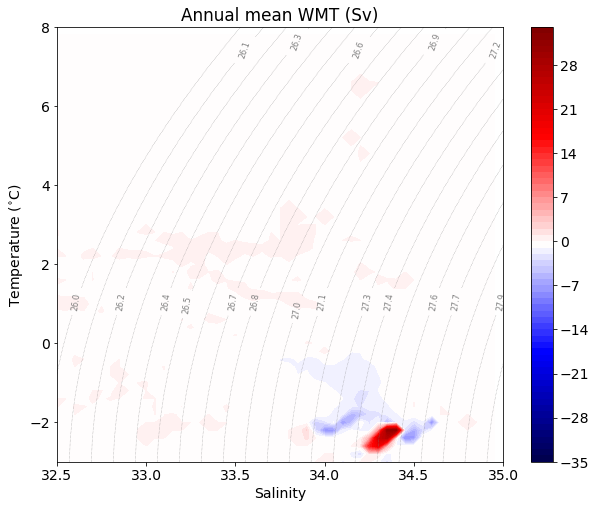

In [33]:
Dt = 1000/(0.05*0.2)

print(Fs_TS_rate_net_shelf_mm_int.shape)

[Sbins,Tbins] = np.meshgrid(sbins,tbins)
print(Tbins.shape, tbins.shape)

fig = plt.figure(figsize=(10, 8))
# plt.pcolormesh(Sbins,Tbins-273.15,np.nanmean(Fs_TS_rate_net_shelf_mm_int*Dt/1e6, axis=0), cmap=plt.cm.seismic), plt.clim([-25,25])
plt.contourf(Sbins,Tbins-273.15,np.nanmean(Fs_TS_rate_net_shelf_mm_int*Dt/1e6, axis=0), levels=np.arange(-35,35,1.), cmap=plt.cm.seismic)
plt.colorbar()
plt.title('Annual mean WMT (Sv)')
plt.xlabel('Salinity'),plt.ylabel('Temperature ($^{\circ}$C)')
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS,fontsize=8)
plt.xlim([32.5,35])
plt.show()

# print(Fs_TS_rate_net_shelf_mm_int*Dt/1e6)

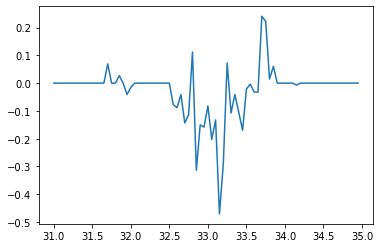

In [42]:
# plt.plot(rho_grid,np.nanmean(Fs_rate_net_shelf_mm_int*Dt/1e6, axis=0))
# plt.show()


diag = np.diagonal(np.nanmean(Fs_TS_rate_net_shelf_mm_int*Dt/1e6, axis=0))
plt.plot(sbins,diag)
plt.show()

In [20]:
# movie

Fs_TS_rate_net_shelf_mov = xr.DataArray(Fs_TS_rate_net_shelf_mm_int*Dt/1e6, name='Fs_salt_net', coords= {'time':np.arange(0,1),'T-bins':tbins,'S-bins':sbins})


In [34]:
fig = plt.figure(figsize=(10,8))

def custom_plotfunc(salt, fig, tt, *args, **kwargs):
    
    plt.contourf(Sbins,Tbins-273.15,np.nanmean(Fs_TS_rate_net_shelf_mm_int*Dt/1e6, axis=0), levels=np.arange(-35,35,1.), cmap=plt.cm.seismic)
    plt.colorbar()
    plt.title('Annual mean WMT (Sv)')
    plt.xlabel('Salinity'),plt.ylabel('Temperature ($^{\circ}$C)')
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS,fontsize=8)
    plt.xlim([32.5,35])

    return None, None

<Figure size 720x576 with 0 Axes>

In [35]:
mov_custom = Movie(Fs_TS_rate_net_shelf_mov, custom_plotfunc, input_check=False)
mov_custom.save('/users/boeiradi/COLD_project/postprocessing/figs/WMT/movie/WAOM10extend_WMT_TS-space_test.mp4', overwrite_existing=True, progress=True, framerate=1)


  0%|          | 0/1 [00:00<?, ?it/s]

Movie created at WAOM10extend_WMT_TS-space_test.mp4
